In [1]:
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# m^2으로 표현된 값을 db로 표현
# 10 * math.log10(7.943282347242816)
10 * math.log10(0.5)

-3.010299956639812

In [3]:
# db로 표현된 값을 m^2으로 표현
# 분자에 db 기입
10**(9/10)

7.943282347242816

In [3]:
# 최대 및 최소값과 그때의 고각 및 방위각 구하기
# 극 좌표계 그림으로도 Plot되도록 변수 설정

file_path = "C:/Users/leeyj/lab_ws/data/RADAR/Tomahawk_PO_3D_1_9GHz.ffe"
# file_path = "C:/Users/leeyj/lab_ws/data/RADAR/Kh58_PO_3D_1_9GHz.ffe"
# file_path = "C:/Users/leeyj/lab_ws/data/RADAR/Shahed136_PO_3D_1_9GHz.ffe"
# file_path = "C:/Users/leeyj/lab_ws/data/RADAR/AH-1_PO_3D_1_9GHz.ffe"
# file_path = "C:/Users/leeyj/lab_ws/data/RADAR/F4_PO_3D_1_9GHz.ffe"
# file_path = "C:/Users/leeyj/lab_ws/data/RADAR/B737_test_final.ffe"
max = -float('inf')
min = float('inf')
max_angles = (None, None)
min_angles = (None, None)

def convert_to_dbsm(rcs_m2):
    return 10 * math.log10(rcs_m2)

with open(file_path, 'r') as file:
    lines = file.readlines()

# RCS 값에 맞는 부분을 찾음
data_start_index = None
for i, line in enumerate(lines):
    if 'RCS(Total)' in line:
        data_start_index = i + 1
        break

elevation_angles = []
rcs_values_dbsm = []
rcs_values_m2 = []

# RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
for line in lines[data_start_index:]:
    if line.strip() == '':
        break
    parts = line.split()
    try:
        elevation = int(float(parts[0]))  # U 고각
        azimuth = int(float(parts[1]))  # V 방위각
        rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
        rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm

        elevation_angles.append(math.radians(elevation))
        rcs_values_dbsm.append(rcs_value_dbsm)
        rcs_values_m2.append(rcs_value_m2)

        # 최대 및 최소 값 업데이트
        if rcs_value_dbsm > max:
            max = rcs_value_dbsm
            max_angles = (elevation, azimuth)
        if rcs_value_dbsm < min:
            min = rcs_value_dbsm
            min_angles = (elevation, azimuth)

    except ValueError:
        continue



print(f"Maximum RCS (dBsm): {max} at Elevation: {max_angles[0]}, Azimuth: {max_angles[1]}")
print(f"Minimum RCS (dBsm): {min} at Elevation: {min_angles[0]}, Azimuth: {min_angles[1]}")

Maximum RCS (dBsm): 39.71104378073287 at Elevation: 0, Azimuth: 91
Minimum RCS (dBsm): -41.73692367685048 at Elevation: 52, Azimuth: 132


In [6]:
average_rcs_m2 = sum(rcs_values_m2) / len(rcs_values_m2)
average_rcs_m2

NameError: name 'rcs_values_m2' is not defined

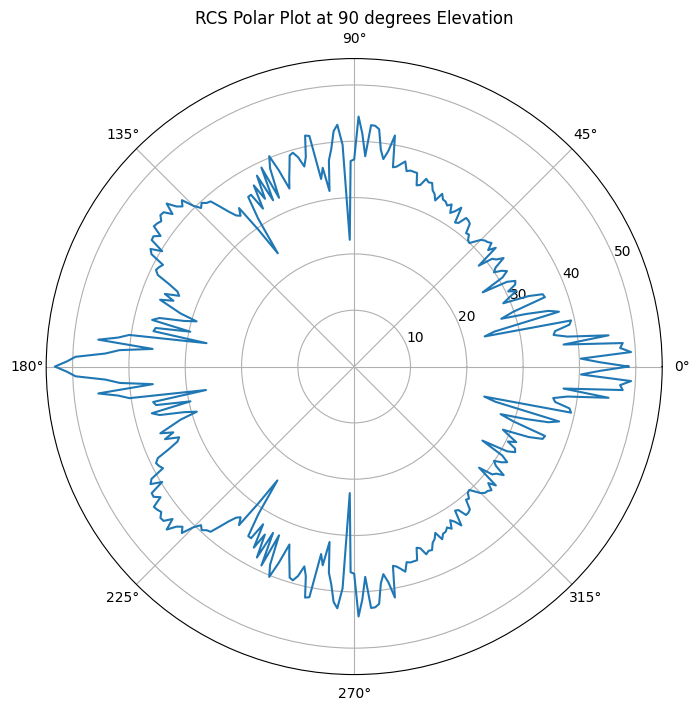

In [16]:

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(elevation_angles, rcs_values_dbsm)
ax.set_title('RCS Polar Plot at 90 degrees Elevation')
plt.show()

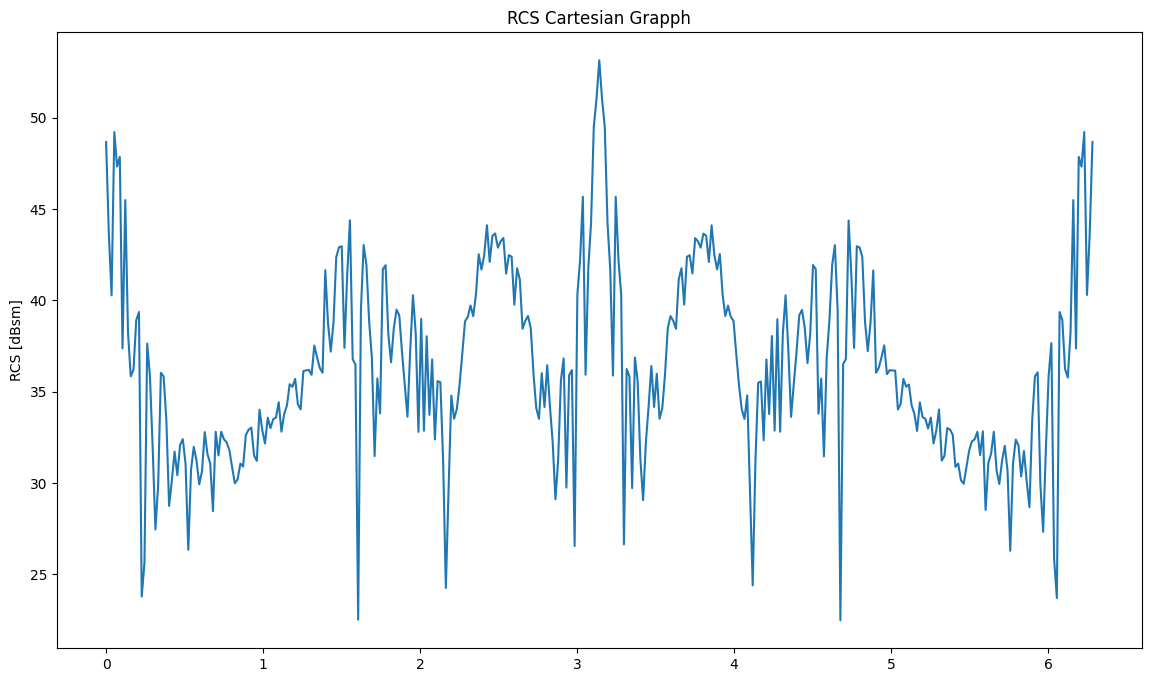

In [27]:
plt.figure(figsize=(14, 8))
plt.plot(elevation_angles, rcs_values_dbsm)
plt.title('RCS Cartesian Grapph')
plt.ylabel("RCS [dBsm]")
plt.show()

In [6]:
# ffe 파일에서 필요한 고각, 방위각, RCS값을 추출한 후 csv파일로 생성
# 0도부터 360도까지의 데이터가 있는 경우
# 경로는 필요에 맞게 알맞게 수정

# ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz.ffe'
# output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz_FFE.csv'
ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Validation/737_PO_2D_1_9GHz_2.ffe'
output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/Validation/737_PO_2D_1_9GHz_2_FFE.csv'

def process_and_save_ffe_to_csv(ffe_file_path, output_csv_path):
    
    def convert_to_dbsm(rcs_m2):
        """m^2울 dBsm으로 변환"""
        return 10 * math.log10(rcs_m2)
    
    with open(ffe_file_path, 'r') as file:
        lines = file.readlines()
    
    # RCS 값에 맞는 부분을 찾음
    data_start_index = None
    for i, line in enumerate(lines):
        if 'RCS(Total)' in line:
            data_start_index = i + 1
            break

    if data_start_index is None:
        return "Data section not found."

    # RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
    rcs_data = {}
    for line in lines[data_start_index:]:
        if line.strip() == '':
            break
        parts = line.split()
        try:
            elevation = int(float(parts[0]))  # U 고각
            azimuth = int(float(parts[1]))  # V 방위각
            rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
            rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm
            if elevation not in rcs_data:
                rcs_data[elevation] = {}
            rcs_data[elevation][azimuth] = rcs_value_dbsm
        except ValueError:
            continue

    # csv 파일로 작성
    with open(output_csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)'])
        for el in range(181):  # Elevation angles from 0 to 180 degrees
            for az in range(361):  # Azimuth angles from 0 to 360 degrees
                rcs_value = rcs_data.get(el, {}).get(az, 'NaN')
                writer.writerow([el, az, rcs_value])

    return "CSV file created successfully."

process_and_save_ffe_to_csv(ffe_file_path, output_csv_path)

'CSV file created successfully.'

In [10]:
# 0도부터 180도까지만의 데이터가 있는 경우

ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F16/f16full.ffe'
output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/F16/f16full_ffe.csv'

rcs_values_m2 = []
rcs_values_dbsm = []

def process_and_save_symmetric_ffe_to_csv(ffe_file_path, output_csv_path):
    
    def convert_to_dbsm(rcs_m2):
        """m^2울 dBsm으로 변환"""
        return 10 * math.log10(rcs_m2)
    
    with open(ffe_file_path, 'r') as file:
        lines = file.readlines()
    
    # RCS 값에 맞는 부분을 찾음
    data_start_index = None
    for i, line in enumerate(lines):
        if 'RCS(Total)' in line:
            data_start_index = i + 1
            break

    if data_start_index is None:
        return "Data section not found."
    


    # RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
    rcs_data = {}
    for line in lines[data_start_index:]:
        if line.strip() == '':
            break
        parts = line.split()
        try:
            elevation = float(parts[0])  # U 고각
            azimuth = float(parts[1])  # V 방위각
            rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
            rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm

            rcs_values_m2.append(rcs_value_m2)
            rcs_values_dbsm.append(rcs_value_dbsm)

            if elevation not in rcs_data:
                rcs_data[elevation] = {}
            rcs_data[elevation][azimuth] = rcs_value_dbsm
        except ValueError:
            continue

    # csv 파일로 작성
    # 이 부분만 181~360도 데이터 처리 부분 추가
    with open(output_csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)'])
        for el in sorted(rcs_data.keys()):  # Elevation angles
            for az in range(361):  # Azimuth angles from 0 to 360 degrees
                if az <= 180:
                    rcs_value = rcs_data.get(el, {}).get(az, 'NaN')
                else:
                    rcs_value = rcs_data.get(el, {}).get(360 - az, 'NaN')
                writer.writerow([el, az, rcs_value])

    return "CSV file created successfully."

process_and_save_symmetric_ffe_to_csv(ffe_file_path, output_csv_path)

average_rcs_m2 = sum(rcs_values_m2) / len(rcs_values_m2)
average_rcs_dbsm = sum(rcs_values_dbsm) / len(rcs_values_dbsm)

In [12]:
print(average_rcs_m2)
print(average_rcs_dbsm)
print(len(rcs_values_m2))

427.36732528812695
5.424775586220769
32761


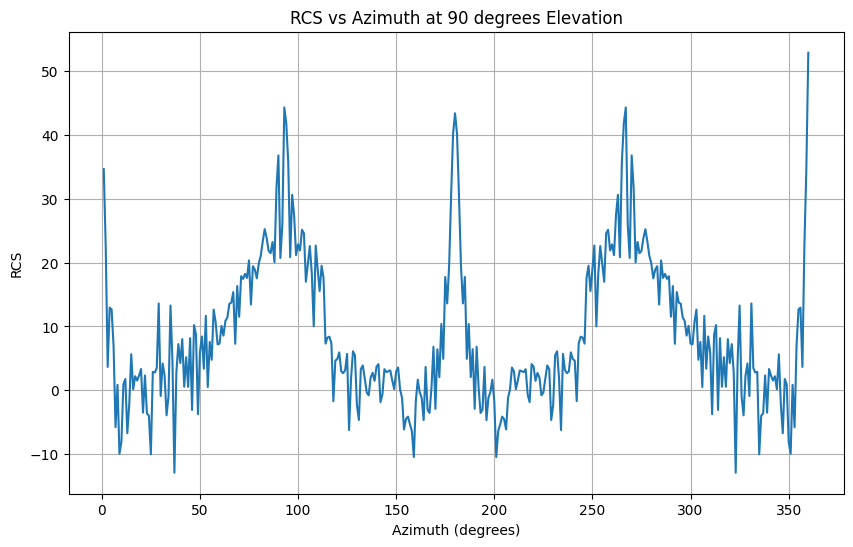

In [3]:
data_path = 'C:/Users/leeyj/lab_ws/data/radar/737/90deg.csv'
data = pd.read_csv(data_path)

azimuth = data.iloc[:, 1].to_numpy()
rcs = data.iloc[:, 2].to_numpy()

# 극 좌표계
azimuth_rad = np.deg2rad(azimuth)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(azimuth_rad, rcs)
ax.set_title('RCS Polar Plot at 90 degrees Elevation')
plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(azimuth, rcs)
# plt.xlabel('Azimuth Angle (degrees)')
# plt.ylabel('RCS Values')
# plt.grid(True)
# plt.show()

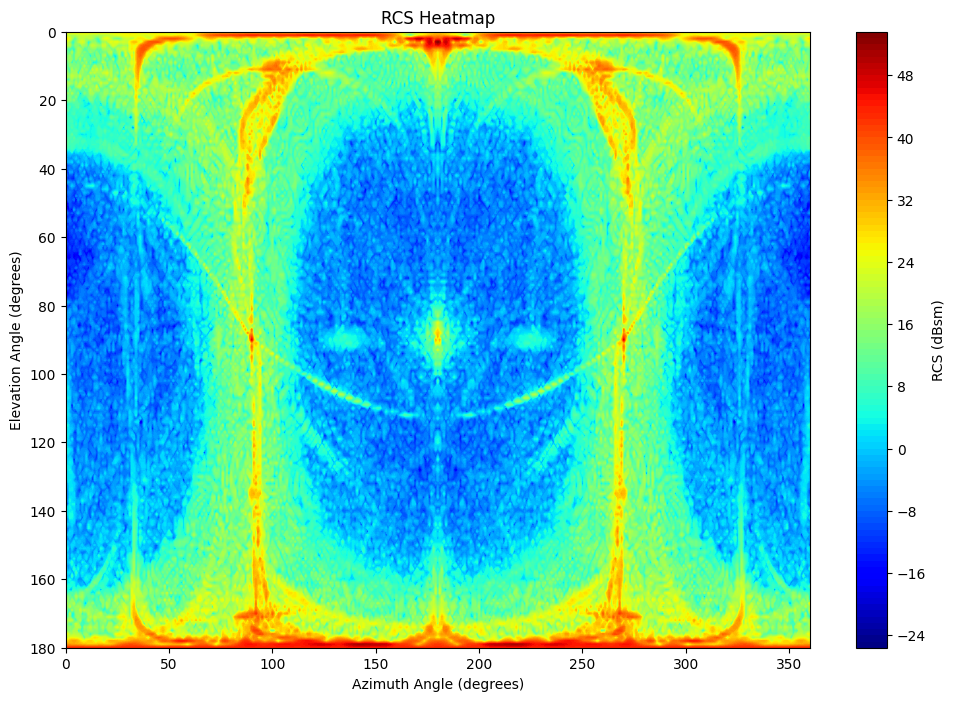

In [4]:
file_path = 'C:/Users/leeyj/lab_ws/data/radar/F16/f16full_ffe.csv'
df = pd.read_csv(file_path)

elevation_angles = df['Elevation Angle (degrees)'].unique()
azimuth_angles = df['Azimuth Angle (degrees)'].unique()
# pivot_table = df.pivot(index='Azimuth Angle (degrees)', columns='Elevation Angle (degrees)', values='RCS (dBsm)')
pivot_table = df.pivot(index='Elevation Angle (degrees)', columns='Azimuth Angle (degrees)', values='RCS (dBsm)')

plt.figure(figsize=(12, 8))
plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='jet')
# plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='viridis')
plt.colorbar(label='RCS (dBsm)')
plt.xlabel('Azimuth Angle (degrees)')
plt.ylabel('Elevation Angle (degrees)')
plt.gca().invert_yaxis()
plt.title('RCS Heatmap')
plt.show()

In [5]:
# 행이 고각으로, 열이 방위각으로 구성된 csv 데이터파일을 생성
# 파일 이름은 알맞게 변경
input_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F16/f16full_ffe.csv'
new_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F16/F-16.csv'

data = pd.read_csv(input_file_path)

# 데이터를 pivot하여 새로운 형태로 재구성
pivoted_data = data.pivot(index='Elevation Angle (degrees)', columns='Azimuth Angle (degrees)', values='RCS (dBsm)')

# 재구성된 데이터를 CSV 파일로 저장
pivoted_data.to_csv(new_file_path, header=False, index=False)

pivoted_data.head()

Azimuth Angle (degrees),0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
Elevation Angle (degrees),,,,,,,,,,,,,,,,,,,,,
0.0,26.229803,26.236383,26.242893,26.249324,26.255669,26.261921,26.268073,26.274118,26.280048,26.285857,...,26.285857,26.280048,26.274118,26.268073,26.261921,26.255669,26.249324,26.242893,26.236383,26.229803
1.0,19.535119,19.423267,19.054425,18.639777,18.486716,18.879495,19.616340,20.425555,20.927078,21.007412,...,21.007412,20.927078,20.425555,19.616340,18.879495,18.486716,18.639777,19.054425,19.423267,19.535119
2.0,26.783205,25.876027,22.916289,17.773601,11.297170,11.313946,16.810844,19.996617,20.512667,18.740385,...,18.740385,20.512667,19.996617,16.810844,11.313946,11.297170,17.773601,22.916289,25.876027,26.783205
3.0,22.513767,20.732647,16.151902,6.072536,6.176827,14.294953,18.137410,21.341649,22.537234,20.426768,...,20.426768,22.537234,21.341649,18.137410,14.294953,6.176827,6.072536,16.151902,20.732647,22.513767
4.0,19.856642,19.946450,19.452336,10.863443,11.830527,16.423156,14.586409,7.027772,17.860786,16.459075,...,16.459075,17.860786,7.027772,14.586409,16.423156,11.830527,10.863443,19.452336,19.946450,19.856642
